In [1]:
import numpy as np
data=np.array([4,5,6,5,4,3,4,5,6,5])

##  ACF, PACF 공식 정리

###  1️⃣ ACF (Autocorrelation Function)

ACF는 시계열 데이터의 lag $k$에 대한 **자기상관계수**를 계산합니다.

$$
\text{ACF}(k) = \frac{\sum_{t=k+1}^{T} (x_t - \bar{x})(x_{t-k} - \bar{x})}{\sum_{t=1}^{T} (x_t - \bar{x})^2}
$$

- $x_t$: 시계열의 $t$번째 값  
- $\bar{x}$: 전체 평균  
- $T$: 전체 시점 수  
- $k$: 시차 (lag)

 현재 값 $x_t$와 $x_{t-k}$ 간의 **전체적인 상관관계**

---

###  2️⃣ PACF (Partial Autocorrelation Function)

PACF는 **중간 시차의 영향을 제거한** lag $k$에 대한 순수 상관관계입니다.

$$
\text{PACF}(k) = \text{Corr}(x_t, x_{t-k} \mid x_{t-1}, x_{t-2}, \dots, x_{t-k+1})
$$

- $\text{Corr}(\cdot)$: 조건부 상관계수  
- 중간 시차들을 제거한 후 $x_t$와 $x_{t-k}$ 간의 **직접적 상관성만** 계산

---

###  실무 요약

| 항목 | 정의 방식              | 의미                  | 모델 적용      |
|------|------------------------|-----------------------|----------------|
| ACF  | 전체 평균 기반 자기상관 | 전체 시점 간 상관성 포함 | MA 차수 추정 |
| PACF | 조건부 상관계수        | 직접 상관성만 반영       | AR 차수 추정 |


<img src="image/stationary.png">

1️⃣ Stationary 시계열
그래프: 평균과 분산이 시간에 따라 변하지 않음

ACF: 대부분의 lag에서 자기상관이 0에 가까움 → 빠르게 감소
전 값과 현재 값이 다르게 움직이기 때문에
→ lag-1 ACF가 매우 작고, 보통 0에 가까움

ADF p-value ≈ 0.01 → 귀무가설(비정상 시계열) 기각 → ✅ 정상성 있음

2️⃣ Non-Stationary 시계열

시간에 따라 평균이나 추세가 변하는 시계열입니다.
이 경우, 바로 전 값과 현재 값이 거의 비슷하게 움직이기 때문에
→ lag-1 ACF가 매우 크고, 보통 1에 가까움

그래프: 시간에 따라 평균이 점점 증가 (선형 추세 포함)

ACF: 점차적으로 천천히 감소 → 자기상관 지속

ADF p-value ≈ 0.77 → 귀무가설 기각 불가 → ❌ 비정상 시계열

| 구분             | ACF(lag=1)  | 이유                             |
| -------------- | ----------- | ------------------------------ |
| Stationary     | 낮음 (0에 가까움) | 과거와 현재 값이 독립적에 가까움             |
| Non-Stationary | 높음 (≈ 1)    | 값이 추세를 따라 움직이며 이전 값이 현재에 강한 영향 |



| 항목          | 정상 시계열           | 비정상 시계열                     |
| ----------- | ---------------- | --------------------------- |
| 평균/분산       | 일정               | 시간에 따라 변화함                  |
| ACF 패턴      | 빠르게 감소           | 천천히 감소, 장기적인 상관성 유지         |
| ADF p-value | 0.05 미만 → 정상성 있음 | 0.05 이상 → 비정상               |
| 예측 가능성      | 통계 모델 적용 가능      | 차분(differencing) 후 모델 적용 필요 |


### acf 개념

In [2]:
import pandas as pd
tempDF = pd.read_csv("../data/daily-min-temperatures.csv", index_col="date", parse_dates=True)
tempDF

,Temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [3]:
temps = tempDF['Temp'].values
temps

array([20.7, 17.9, 18.8, ..., 13.5, 15.7, 13. ], shape=(3650,))

In [4]:
temps[1:]

array([17.9, 18.8, 14.6, ..., 13.5, 15.7, 13. ], shape=(3649,))

In [5]:
temps[:-1]

array([20.7, 17.9, 18.8, ..., 13.6, 13.5, 15.7], shape=(3649,))

In [ ]:
import numpy as np
np.corrcoef(temps[1:] ,temps[:-1] ) #lag 1

array([[1.        , 0.77487022],
       [0.77487022, 1.        ]])

In [ ]:
np.corrcoef(temps[2:] ,temps[:-2] ) #lag 2

array([[1.        , 0.63111946],
       [0.63111946, 1.        ]])

In [11]:
np.corrcoef(temps[3:] ,temps[:-3] ) #lag 3

array([[1.        , 0.58637486],
       [0.58637486, 1.        ]])

In [13]:
autocorrelation =[]
for shift in range(1,10):
    c = np.corrcoef( temps[:-shift], temps[shift:])[0,1]
    autocorrelation.append(c)
autocorrelation

[np.float64(0.7748702165384459),
 np.float64(0.6311194620684835),
 np.float64(0.5863748620126275),
 np.float64(0.5788976133377619),
 np.float64(0.5785715744112058),
 np.float64(0.5765484145122559),
 np.float64(0.5759289535831578),
 np.float64(0.5695569780397495),
 np.float64(0.5634747178408281)]

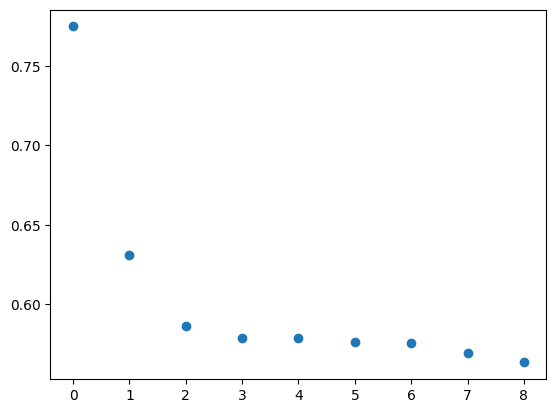

In [14]:
import matplotlib.pyplot as plt
plt.scatter( range(0, len( autocorrelation)) , autocorrelation)

In [3]:
tempDF.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='date', length=3650, freq=None)

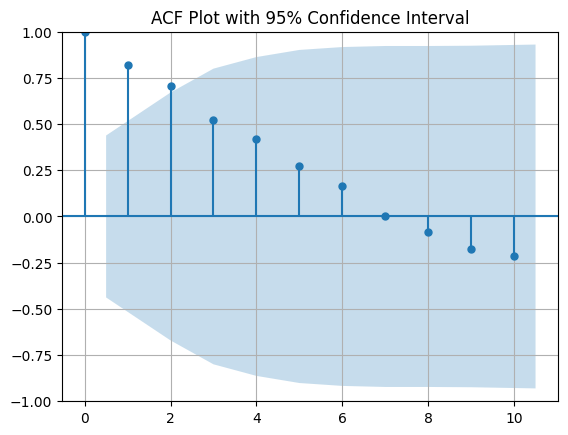

📊 Lag별 p-value
Lag 1: p-value = 0.0001
Lag 2: p-value = 0.0000
Lag 3: p-value = 0.0000
Lag 4: p-value = 0.0000
Lag 5: p-value = 0.0000
Lag 6: p-value = 0.0000
Lag 7: p-value = 0.0000
Lag 8: p-value = 0.0000
Lag 9: p-value = 0.0000
Lag 10: p-value = 0.0000
❌ 자기상관 있음 → 비정상 가능성 높음


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf,adfuller
from statsmodels.graphics.tsaplots import plot_acf

# 예시 데이터 (비정상 시계열로 테스트)
x = np.arange(1, 21) + np.random.normal(0, 1, 20)

# ACF 계산: nlags=10, alpha=0.05로 신뢰구간 포함
acf_vals, confint, qstat, pvalues = acf(x, nlags=10, alpha=0.05, qstat=True)

#  ACF 그래프 그리기
plot_acf(x, lags=10, alpha=0.05)
plt.title("ACF Plot with 95% Confidence Interval")
plt.grid(True)
plt.show()

#  각 lag에 대한 p-value 출력
print(" Lag별 p-value")
for i, p in enumerate(pvalues):
    print(f"Lag {i+1}: p-value = {p:.4f}")

if pvalues[-1] < 0.05:
    print(" 자기상관 있음 → 비정상 가능성 높음")
else:
    print(" 자기상관 없음 → 정상 시계열 가능성 있음")


| 구성 요소                            | 설명                                   |
| -------------------------------- | ------------------------------------ |
| `acf(x, alpha=0.05, qstat=True)` | ACF 계산 + 신뢰구간 + Q통계량 + p-value 함께 반환 |
| `plot_acf(x)`                    | ACF 시각화                              |
| `pvalues`                        | 각 lag에 대해 Ljung-Box 검정의 p-value      |
| `acf_vals`, `confint`            | ACF 계수와 95% 신뢰구간                     |


✅ p-value 해석

p-value < 0.05 → 해당 lag에서 자기상관 있음 (유의)

p-value ≥ 0.05 → 해당 lag에서 자기상관 없음

✅ ADF 검정 (Augmented Dickey-Fuller Test):

시계열 데이터가 정상(stationary)인지 아닌지를 판단하는 가장 널리 쓰이는 통계적 방법

- 시계열 분석에서 정상성은 매우 중요.
- 정상성을 갖지 않으면 → 평균, 분산이 시간에 따라 바뀌고 → 예측이 어렵고 모델이 잘 작동하지 않음

- 그래서 ADF 검정을 통해 "이 시계열이 예측 가능한가?", "차분이 필요한가?" 등을 판단.

In [ ]:
result = adfuller(x)
print(" ADF Test")
print(f"ADF 통계량: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

if result[1] < 0.05:
    print("✅ 정상 시계열 (stationary)")
else:
    print("❌ 비정상 시계열 (non-stationary)")

📌 ADF Test
ADF 통계량: 0.0910
p-value: 0.9654
❌ 비정상 시계열 (non-stationary)


| 비교 대상 | `acf(..., qstat=True)`                  | `adfuller()`              |
| ----- | --------------------------------------- | ------------------------- |
| 목적    | **자기상관이 존재하는지**                         | **단위근(비정상성)이 존재하는지**      |
| 귀무가설  | white noise (자기상관 없음)                   | 비정상 시계열 (unit root 있음)    |
| 해석 방식 | p < 0.05 → **자기상관 있음** → **비정상 가능성 있음** | p < 0.05 → **정상 시계열**로 판단 |


| 구분          | 설명                                         |
| ----------- | ------------------------------------------ |
| **정상 시계열**  | 평균과 분산이 시간에 따라 **변하지 않음**.                 |
| **비정상 시계열** | 평균, 분산, 공분산 등이 시간에 따라 **변함** (추세, 계절성 포함). |


## ✅ <span style="color:red"> 시계열 분석의 핵심 흐름</span>

1. 현실의 대부분의 시계열 데이터는 비정상성 (non-stationary) 을 가짐

- 예: 주가, 기온, 트래픽, 매출 등은 시간에 따라 평균/분산이 변함

2. 그러나 통계적 모델(AR, MA, ARMA, ARIMA 등)은 정상성(stationarity)을 전제로 함

- 평균, 분산, 공분산이 일정해야 수학적 가정이 성립됨

3. 따라서 분석자는 비정상 시계열을 → 정상 시계열로 변환 후 분석함

- 방법: 차분(differencing), 로그 변환, 계절성 제거, 트렌드 제거 등

📌 최종 정리

"우리가 분석하는 대부분의 시계열 데이터는 원래 non-stationary이며,

분석을 위해 먼저 stationary로 변환한 후 모델을 적용한다."

## pacf 그래프

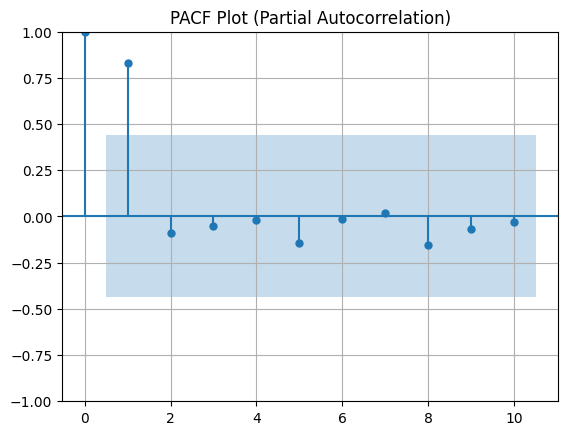

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

# 예시: 비정상 시계열
np.random.seed(42)  # 재현 가능성
x = np.arange(1, 21) + np.random.normal(0, 1, 20)

# PACF 그래프
plot_pacf(x, lags=10, method='ywm')  # Yule-Walker method
plt.title("PACF Plot (Partial Autocorrelation)")
plt.grid(True)
plt.show()


📌 결과 해석 가이드

PACF는 **"한 시점 전까지만 조건부로 통제했을 때의 자기상관"**을 보여준다다.

일반적으로 AR 모델의 차수를 추정할 때 사용됩니다.

| 그래프      | 관찰된 패턴               | 해석                                |
| -------- | -------------------- | --------------------------------- |
| **PACF** | lag 1에서 뚜렷한 값, 이후 급감 | → AR(1) 구조 가능성 (직접 영향은 lag 1에 집중) |



| 함수            | 역할                               |
| ------------- | -------------------------------- |
| `plot_acf()`  | 전체 lag에 걸친 자기상관 보기               |
| `plot_pacf()` | 각 lag 별로 직접적인 영향만 보기 (중간 lag 제거) |
| 사용 목적         | AR(p) 차수 추정 또는 비정상성 파악 보조        |


| 요소                    | 역할                          | 사용하는 함수                |
| --------------------- | --------------------------- | ---------------------- |
| **ADF, KPSS 검정**      | 차분이 필요한지 확인 (**정상성 여부 판단**) | `adfuller()`, `kpss()` |
| **차분 (Differencing)** | 비정상 시계열을 **정상화**하기 위한 전처리   | `x_diff = np.diff(x)`  |
| **PACF**              | 정상화된 시계열에서 **AR 차수 p 결정**   | `plot_pacf()`          |
| **ACF**               | 정상화된 시계열에서 **MA 차수 q 결정**   | `plot_acf()`           |
